In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки

    абонентская плата отсутствует;
    стоимость одной минуты поездки — 88 рублей;
    стоимость старта (начала поездки) — 5050 рублей;
с подпиской Ultra

    абонентская плата — 199199 рублей в месяц;
    стоимость одной минуты поездки — 66 рублей;
    стоимость старта — бесплатно.

# Шаг 1. Загрузка данных

In [6]:
df_user = pd.read_csv('datasets/users_go.csv')
df_rides = pd.read_csv('datasets/rides_go.csv')
df_sub = pd.read_csv('datasets/subscriptions_go.csv')

In [7]:
display(df_user.info())
display(df_user.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [8]:
display(df_rides.info())
display(df_rides.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
display(df_sub.info())
display(df_sub.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В таблице с подписками-пустых значений не обнаружено, столбец типы выбраны корректно.

# Шаг 2. Предобработка данных

Приведем стобец с датой к нужному типу, и создадим новый стобец с месяцем:

In [10]:
df_rides.date = pd.to_datetime(df_rides.date, format='%Y-%m-%d')
df_rides['mounth'] = df_rides.date.dt.month
df_rides.head()

,user_id,distance,duration,date,mounth
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим датафреймы на наличие явных дубликатов:


In [11]:
print(f'Количество дубликтов в df_rides - {df_rides.duplicated().sum()}')
print(f'Количество дубликтов в df_user - {df_user.duplicated().sum()}')
print(f'Количество дубликтов в df_sub - {df_sub.duplicated().sum()}')

Количество дубликтов в df_rides - 0
Количество дубликтов в df_user - 31
Количество дубликтов в df_sub - 0


Обработаем дубликаты в таблице с пользователями. Удалим эти значения

In [12]:
df_user = df_user.drop_duplicates()
print(f'Количество дубликтов в df_user - {df_user.duplicated().sum()}')

Количество дубликтов в df_user - 0


Предобработка закончена, больше проблем в данных не вывлено.

# Шаг 3. Исследовательский анализ данных

## 3.1 частота встречаемости городов;

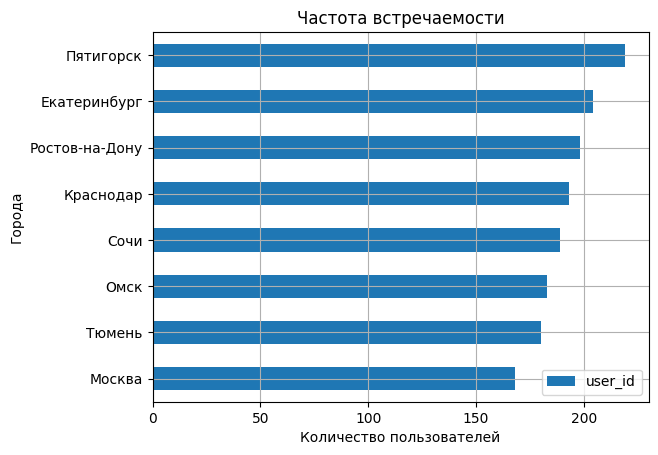

In [13]:
pv_city = df_user.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count').sort_values(by='user_id')
pv_city.plot( kind='barh', grid = True)
plt.title('Частота встречаемости')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()

В данных содержится информация о пользователях из 8-ми городов Больше всего пользователей из Пятигорска, меньше всего из Москвы

## 3.2 соотношение пользователей с подпиской и без подписки;

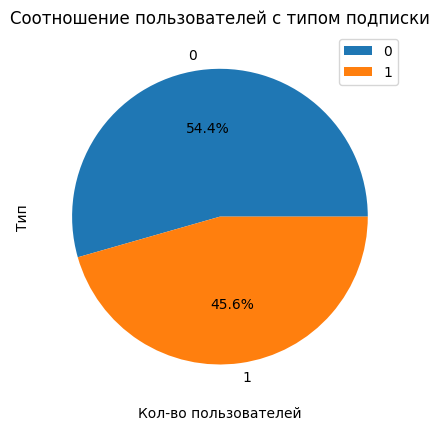

,subscription_type,user_id
0,free,835
1,ultra,699


In [14]:
pv_subs = df_user.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').reset_index()
pv_subs.plot(x = 'subscription_type',y='user_id', kind='pie', autopct='%1.1f%%', grid = True )
plt.title('Соотношение пользователей с типом подписки')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Тип')
plt.show()
display(pv_subs)

Пользователей без подписки больше чем больше чем пользователей с подпиской Ultra(на ~10%)

##  3.3 возраст пользователей;

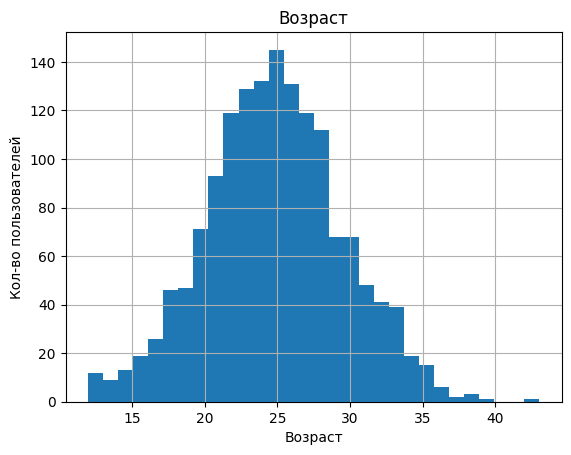

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [18]:
df_user['age'].plot(kind = 'hist', grid=True, bins = 30)
plt.title('Возраст')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')
plt.show()
df_user['age'].describe()

На графике видим распределение близкое к нормальному. Медиана и среднее значение почти совпадают: 25 и 24.9. С данными всё хорошо, аномалий не наблюдается


## 3.4 Расстояние, которое пользователь преодолел за одну поездку

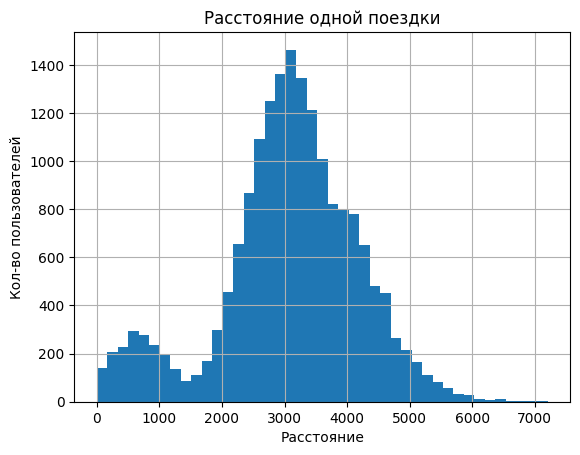

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [19]:
df_rides['distance'].plot(kind = 'hist', grid=True, bins = 43)
plt.title('Расстояние одной поездки')
plt.xlabel('Расстояние')
plt.ylabel('Кол-во пользователей')
plt.show()
df_rides['distance'].describe()

<Axes: >

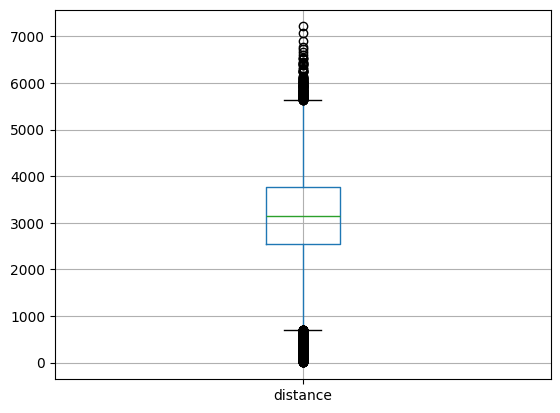

In [20]:
df_rides.boxplot('distance')

Среднее расстояние практически совпадает с медианой. Большинство поездок чуль больше 3-х километров. Видим небольшой всплеск значений при растоянии 500-1000м. Возможно люди брали самокаты чтобы не опоздать на поезд/автобус/работу и съэкономить несколько минут.

## 3.5 Продолжительность поездок

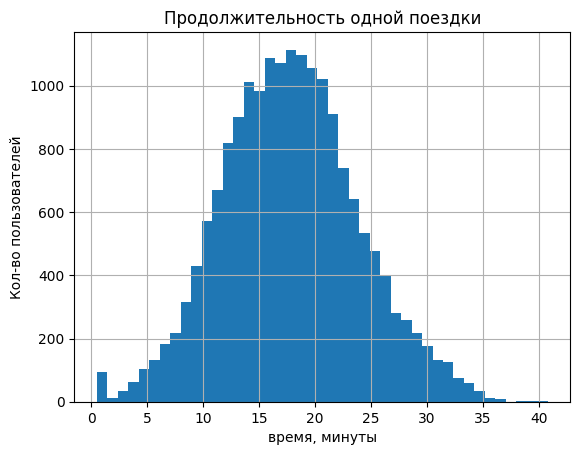

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [21]:
df_rides['duration'].plot(kind = 'hist', grid=True, bins = 43)
plt.title('Продолжительность одной поездки')
plt.xlabel('время, минуты')
plt.ylabel('Кол-во пользователей')
plt.show()
df_rides['duration'].describe()

<Axes: >

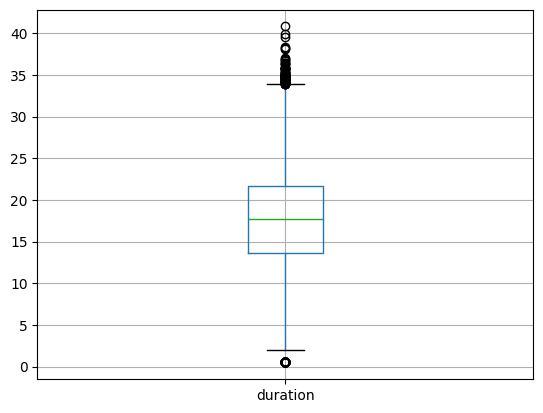

In [22]:
df_rides.boxplot('duration')

Видим распределение близкое по Гауссу. Среднее время поездки совпадает с медианой 17.7 мин, 17.67мин.

# Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [23]:
data_join = df_rides.copy() # создадим копию, чтобы оставить исходные данные в целости
data_join = data_join.merge(df_user, how = 'left', on = 'user_id' )
data_join = data_join.merge(df_sub, how = 'left', on='subscription_type')
display(data_join)

,user_id,distance,duration,date,mounth,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [24]:
print(f'Кол-во строк в исходных данных: {df_rides.shape[0]}')
print(f'Кол-во строк в новой таблице: {data_join.shape[0]}')

Кол-во строк в исходных данных: 18068
Кол-во строк в новой таблице: 18068


Создадим еще 2 датафрейма для анализа пользователей с разными типами подписки.


In [25]:
join_free = data_join[data_join['subscription_type'] == 'free']
display(join_free.head())
join_ultra = data_join[data_join['subscription_type'] == 'ultra']
display(join_ultra.head())

,user_id,distance,duration,date,mounth,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


,user_id,distance,duration,date,mounth,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Визуализируем информацию о расстоянии поездок для пользователей обеих категорий.

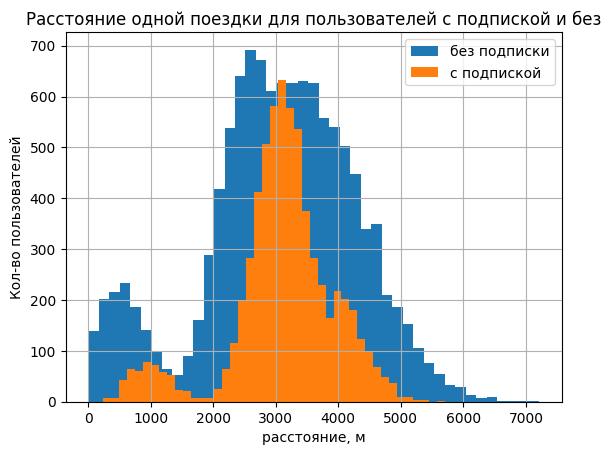

In [26]:
ax = join_free['distance'].plot(kind = 'hist', grid=True, bins = 43, label='без подписки')
ax = join_ultra['distance'].plot(kind = 'hist', grid=True, bins = 43, label='с подпиской')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('расстояние, м')
plt.ylabel('Кол-во пользователей')
plt.legend()
plt.show()

Видим что распределение в обоих выборках примерно одинаковое.Видим всплеск значений: Без подписки на ~ 500м, С подпиской ~ 1000м. В целом, основные данные распередлены: без подписки (с ~ 2000-4300м), с подпиской (~ 2500-3500м). Максимумы и минимумы одинаковы.Распределение похоже на распределение по Гауссу. В среднем, растояние около 3000м.

Визуализируем информацию о расстоянии поездок для пользователей обеих категорий.

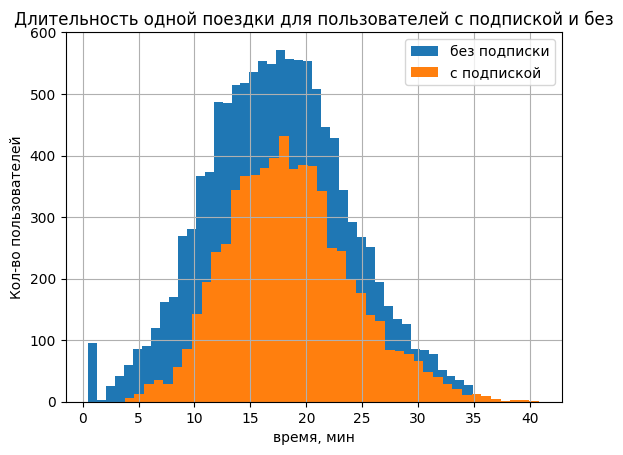

In [27]:
ax = join_free['duration'].plot(kind = 'hist', grid=True, bins = 43, label='без подписки')
ax = join_ultra['duration'].plot(kind = 'hist', grid=True, bins = 43, label='с подпиской')
plt.title('Длительность одной поездки для пользователей с подпиской и без')
plt.xlabel('время, мин')
plt.ylabel('Кол-во пользователей')
plt.legend()
plt.show()

Видим что распределение в обоих выборках примерно одинаковое.Видим аномальные значения на 0 мин для пользователей без подписки. В целом, основные данные распередлены: без подписки (с ~ 10-24мин), с подпиской (~ 14-24м).Распределение похоже на Нормальное распределение. В среднем время поездки составляет 15-20 мин.

# Шаг 5. Подсчёт выручки¶

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Удостоверимся, что в сводной таблице отсутсвуют пропущенные значения:


In [28]:
data_join.isna().sum()

user_id              0
distance             0
duration             0
date                 0
mounth               0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [29]:
data_join['duration'] = np.ceil(data_join['duration'])
data_join['duration'] = data_join['duration'].astype('int')

join_pv = data_join.pivot_table(index= ['user_id', 'mounth'], values = ['distance', 'duration'], aggfunc = ['count', 'sum'])
join_pv.columns = ['_'.join(col) for col in join_pv.columns.values]
join_pv = join_pv.drop(columns=['count_duration']).reset_index()
display(join_pv.sort_values(by=['user_id', 'mounth']))

,user_id,mounth,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26
11327,1534,8,2,7622.453034,48
11328,1534,9,1,4928.173852,23
11329,1534,11,4,13350.015305,78


В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.

В начале объединим нужные таблицы:

In [30]:
join_pv = join_pv.merge(df_user, how='left', on='user_id')
join_pv = join_pv.merge(df_sub, how = 'left', on='subscription_type')
display(join_pv)

,user_id,mounth,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0


In [31]:
def earn(row):
  cash = 0
  cash = (row['start_ride_price'] * row['count_distance'] +
              row['minute_price'] * row['sum_duration'] +
              row['subscription_fee']
              )
  return cash

join_pv['earn'] = join_pv.apply(earn, axis=1)
display(join_pv[['user_id', 'name', 'mounth', 'earn']])

,user_id,name,mounth,earn
0,1,Кира,1,451
1,1,Кира,4,241
2,1,Кира,8,475
3,1,Кира,10,391
4,1,Кира,11,535
...,...,...,...,...
11326,1534,Альберт,6,308
11327,1534,Альберт,8,484
11328,1534,Альберт,9,234
11329,1534,Альберт,11,824


# Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.

Нулевая теория: среднее время поездок пользователей с подпиской и пользователей без подписки одинаковы

Альтернативная гипотеза: пользователи с подпиской тратят больше времени

In [33]:
alpha = 0.05
results = st.ttest_ind(join_ultra['duration'], join_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


Подтверждаем альтернативную гипотезу.Среднее время поездок пользователей с подпиской больше время поездок пользователей без подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Нулевая гипотеза: среднее расстояние поездки пользователи с подпиской равна 3130 метрам
Альтернативная гипотеза: среднее расстояние поездки пользователи с подпиской больше 3130 метров

In [34]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(join_ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Отвергаем нулевую гипотезу


Следовательно, верна альтернативная гипотеза и Средняя дистанция поездки пользователей с подпиской действительно меньше 3130 метров.

6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без равны.
join_pv_free = join_pv[join_pv['subscription_type'] == 'free']
join_pv_ultra = join_pv[join_pv['subscription_type'] == 'ultra']
alpha = 0.05

results = st.ttest_ind(join_pv_ultra['earn'], join_pv_free['earn'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки

In [35]:
join_pv_free = join_pv[join_pv['subscription_type'] == 'free']
join_pv_ultra = join_pv[join_pv['subscription_type'] == 'ultra']
alpha = 0.05

results = st.ttest_ind(join_pv_ultra['earn'], join_pv_free['earn'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Выбираем альтернативную гипотезу, значит помесячная выручка от пользователей с подпиской больше.

6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для подобной ситуации, хорошим решением будет метод stats.ttest_rel(). Стьюдентный критерий для парных выборок используется для сравнения средних значений двух выборок, когда каждое наблюдение в одной выборке может быть сопоставлено с наблюдением в другой выборке.


# 6  Вывод:

По предоставленным данным из 8-ми городов, больше всего пользователей из Пятигорска, меньше всего из Москвы.

Визуализируя и анализируя данные мы выяснили:

    Средний возраст пользователя сервиса - 25 лет
    Среднее расстояние большинства поездок чуль больше 3-х километров.
    Пользователей сервиса аренды самокатов без подписки больше чем пользователей с подпиской.
    Средняя выручка от пользователей с подпиской Ultra больше чем от пользователей без неё

В ходе аналитического исследования были подтверждены следующие гипотезы:

    с вероятностью 5% время поездок пользователей с подпиской больше время поездок пользователей без подписки
    средняя дистанция поездки пользователи с подпиской меньше 3130 метров
    Ежемесячная выручка от пользователей с подпиской выше чем выручка от пользователей без неё

Могу порекомендовать развивать функционал подписки Ultra, что увеличит число пользователей, а значит и ежемесячную выручку.
